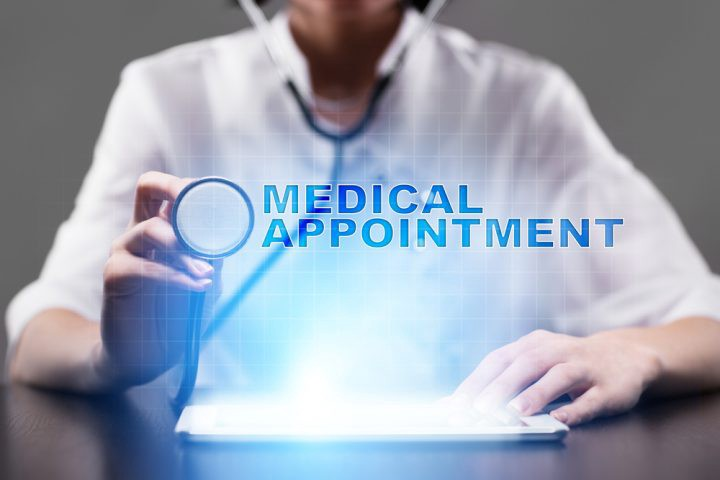

In [1]:
# importing nice pictures
from IPython.display import Image
Image("1_2heJl1x3BPS9zLJiZfudCg.jpeg")

---
# Project Introduction:
---
This analysis is part of the **Udacity Data Analysis professional program Egypt FWD** The goal of this project to investigate a dataset of appointment records for Brasil public hospitals. It aims to explore a dataset containing approximately 100k medical appointments from the Brazilian public health system. I divided this project to main 4 parts as the following : (1) Introduction, where I investigation problems in the dataset, try to understand it and described it. (2) Data Wrangling, cleaning data by removing wrong data.  (3) Exploratory Data Analysis,The analysis should be focused on finding trends influencing patients to show or not show up to appointments; (4) Conclusion communicate our findings the team member and stockholders.

### Note:
---
My main focus in this project to see how different aspects effect if the patient going to attend his appointment or going to no show it

# Project: Investigate a Dataset **(No show appointments)**

## Table of Contents

1. [Introduction](Introduction:)
2. [Data Wrangling](Data_Wrangling:)
3. <a href="#eda">Exploratory Data Analysis</a></li>
4. <a href="#conclusions">Conclusions</a></li>


## Introduction:              

No-shows occur, when a patient fails to attend a scheduled appointment with no prior notification to the healthcare provider. They are missed healthcare utilized time slots and resources that can negatively affect the utilization of space and human resources. Further, they can affect the patient’s health condition due to the delay in diagnosis or treatment. Prospective patients can also be impacted and less satisfied due to their inability of scheduling timely appointments. 

the total dataset is consist of 110.527 medical appointments with 14 columns (characteristics). The most important one if the patient show-up or no-show to the appointment.

Columns:

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female.
* AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* Age: How old is the patient.
* Neighborhood: Where the appointment takes place.
* Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* Hypertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handicap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False.

In [2]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
import seaborn as sns

In [3]:
# import data from csv file
# read the data from csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Read the first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# check the data shape
df.shape
print(f"the No-Show dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

the No-Show dataframe has 110527 rows and 14 columns


In [6]:
# understand the data using descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# identify the unique values in each column
unique_values = df.nunique()
unique_values

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Print the unique values in each column
print(f"The Unique Values in 'Gender' column is  -> {df['Gender'].unique()}")
print(f"The Unique Values in 'Age' column is  -> {np.sort(df['Age'].unique())}")
print(f"The Unique Values in 'Scholarship' column is  -> {df['Scholarship'].unique()}")
print(f"The Unique Values in 'Hypertension' column is  -> {df['Hipertension'].unique()}")
print(f"The Unique Values in 'Diabetes' column is-> {df['Diabetes'].unique()}")
print(f"The Unique Values in 'Alcoholism' column is-> {df['Alcoholism'].unique()}")
print(f"The Unique Values in 'Handicap' column is -> {df['Handcap'].unique()}")
print(f"The Unique Values in 'SMSReceived' column is -> {df['SMS_received'].unique()}")
print(f"The Unique Values in 'No-show' column is -> {df['No-show'].unique()}")

The Unique Values in 'Gender' column is  -> ['F' 'M']
The Unique Values in 'Age' column is  -> [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
The Unique Values in 'Scholarship' column is  -> [0 1]
The Unique Values in 'Hypertension' column is  -> [1 0]
The Unique Values in 'Diabetes' column is-> [0 1]
The Unique Values in 'Alcoholism' column is-> [0 1]
The Unique Values in 'Handicap' column is -> [0 1 2 3 4]
The Unique Values in 'SMSReceived' column is -> [0 1]
The Unique Values in 'No-show' column is -> ['No' 'Yes']


In [10]:
# full view of the data
# check the null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Comments on the Dataset:
* The dataset is not clean, there are some wrong data in the dataset as the following.
  * patient id is float type
  * appointment id is int type
  * few column names misspelled, like  No-show, Hypertension, Diabetes,Handicap. 
  * the column ScheduledDay is not a date, it is a string.
  * the column AppointmentDay is not a date, it is a string. 
  * the column "No-show" is not a boolean, it is a string.
  * the age column have negative values.
  * the handicap column isn't standardized 
* The patient id is not unique, there are some duplicated patient id this issue mean one paint book more than one appointment .

# Data_wrangling:
![Data wrangling](images1.jpg)

In [11]:
# copy the dataset to a new dataset
df_copy = df.copy()

In [12]:
# change the data type of the columns patient id & appointment id
df_copy[["PatientId","AppointmentID"]] = df_copy[["PatientId","AppointmentID"]].astype(str)

In [13]:
# correc columns names
df_copy.rename(columns={"PatientId":"PatientID","No-show":"No_show","Handcap":"Handicap","Hipertension":"Hypertension"}, inplace=True)


In [14]:
# check the data types of the columns
df_copy["ScheduledDay"]=pd.to_datetime(df_copy["ScheduledDay"])
df_copy["AppointmentDay"]=pd.to_datetime(df_copy["AppointmentDay"])

In [15]:
# get to know rows with negative Age
minus_age = df_copy[df_copy["Age"]< 0]
minus_age

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
# drop the rows with negative age
df_copy.drop(minus_age.index, inplace=True)

In [17]:
# standardize the data of No-show column by changing the data of the columns from yes and no to 1 and 0
df_copy["No_show"] = df_copy["No_show"].replace(["Yes","No"],[1,0])

In [18]:
# standardize the data of Handicap column by changing the data of the columns from 2,3,4 to 1
df_copy["Handicap"] = df_copy["Handicap"].replace([2,3,4],[1,1,1])

In [19]:
# print the first 5 rows of the copied data
df_copy.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [20]:
# print the data information
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No_show       

# Exploratory Data Analysis:
![Exploratory Data Analysis:](images.png)

#### After the data wrangling, the dataset is now clean and ready to be used for analysis.
* Analyzing the data will be focused on the following Questions : 
  * the relation between the patient and the appointment.
    * Does each patient have only one appointment? 
  * Does number of days between the scheduled day and appointment effect on the patient show-up or no-show ?
  * Does the age affect the patient show-up or no-show ? 
  * Does the neighborhood affect the patient show-up or no-show ?

In [21]:
# Does each patient have one appointment?
df_copy.groupby("PatientID")["AppointmentID"].count().sort_values(ascending=False)

PatientID
822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
6264198675331.0      62
                     ..
4753423615362.0       1
47535985669137.0      1
47537342295952.0      1
47543338513.0         1
99999967293459.0      1
Name: AppointmentID, Length: 62298, dtype: int64

## First indication of the patient and the appointment:
* The first indication is that some patient have more than one appointment and some others only have one appointment. 

# Does number of days between the scheduled day and appointment effect on the patient show-up or no-show 

In [22]:
# calculate the difference between appointment day and schedule day
date_diff = df_copy["AppointmentDay"].dt.date - df_copy["ScheduledDay"].dt.date
# remove the hours from date_diff
date_diff= date_diff.dt.days
date_diff_df = pd.DataFrame([date_diff, df_copy["No_show"]]).T
date_diff_df.columns = ["Date_diff","No_show"]
date_diff_df["No_show"].unique()


array([0, 1], dtype=int64)

In [23]:
# create mask for dataframe
mask = (date_diff_df["Date_diff"]>=0)
masked_df = date_diff_df[mask]
masked_df.head()

,Date_diff,No_show
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
# grouping the data by No_show and Date_diff
print(f"The number of patients who did not show up on time is {masked_df.shape[0]}")

The number of patients who did not show up on time is 110521


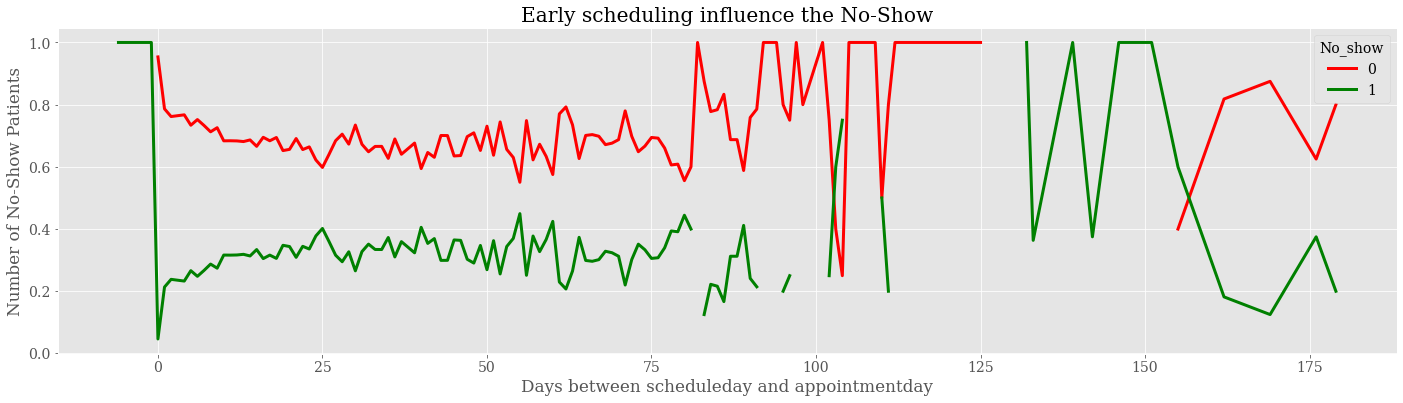

In [25]:
# ploting the Date_diff vs No_show
(date_diff_df.groupby("Date_diff")["No_show"]
.value_counts(normalize=True).unstack()
.plot(kind="line", figsize=(24,6), color=["red","green"], linewidth=3, fontsize=14))
plt.ylabel('Number of No-Show Patients');
plt.xlabel('Days between scheduleday and appointmentday');
plt.title("Early scheduling influence the No-Show");
plt.show();


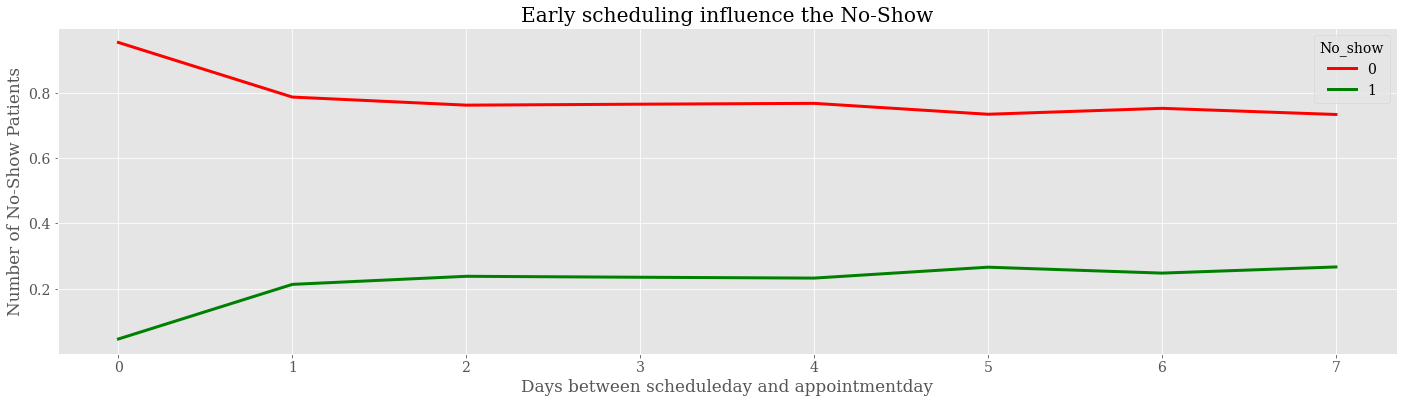

In [26]:
# ploting the Date_diff vs No_show
(date_diff_df.query("Date_diff>=0 and Date_diff<=7")
.groupby("Date_diff")["No_show"]
.value_counts(normalize=True).unstack()
.plot(kind="line", figsize=(24,6), color=["red","green"], linewidth=3, fontsize=14))
plt.ylabel('Number of No-Show Patients');
plt.xlabel('Days between scheduleday and appointmentday');
plt.title("Early scheduling influence the No-Show");
plt.show();

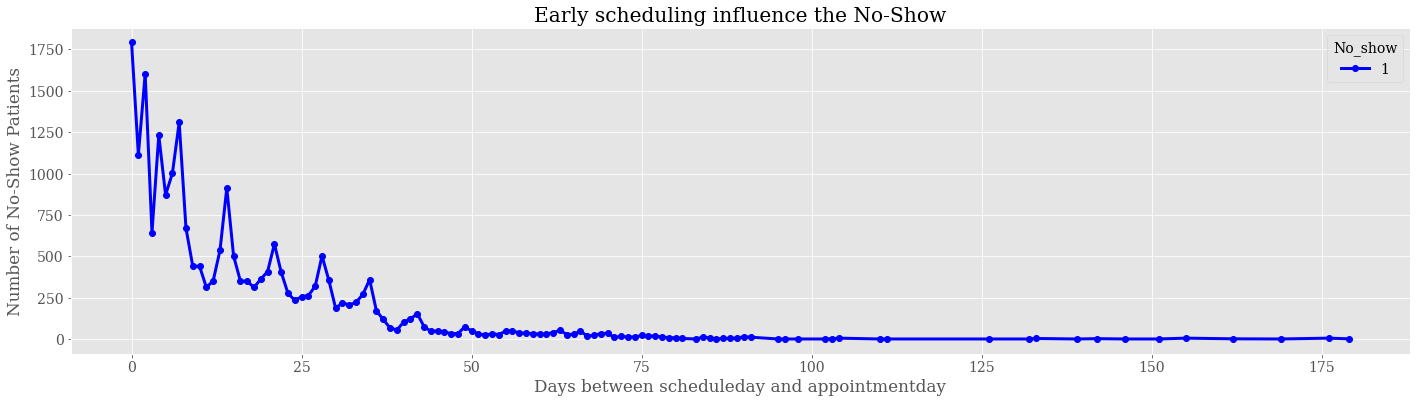

In [27]:
# ploting the Date_diff vs No_show
(date_diff_df.query("Date_diff>=0 and No_show ==1")
.groupby("Date_diff")["No_show"]
.value_counts().unstack()
.plot(kind="line", figsize=(24,6), 
color = "blue",linewidth=3, fontsize=14, marker='o'))
plt.ylabel('Number of No-Show Patients');
plt.xlabel('Days between scheduleday and appointmentday');
plt.title("Early scheduling influence the No-Show");
plt.show();

## First Conclusion:
#### Does the number of days between the scheduled day and appointment effect on the patient show-up or no-show ?
* From the data set, we can see that the number of days between the scheduled day and appointment is the most important factor in the patient show-up or no-show.
* The more days between the scheduled day and appointment, the more likely the patient not show-up to the appointment.

The second question is:
* Does the age affect the patient show-up or no-show ? 

In [28]:
# bin the Age to 4 categories
bin_labels = ['CHD', 'Adult', 'Middle_age', 'Senior']
bin_edges = [0,13,40,60,116]
df_copy['Age_group']=pd.cut(df_copy['Age'], bins = bin_edges,labels=bin_labels,include_lowest = True)

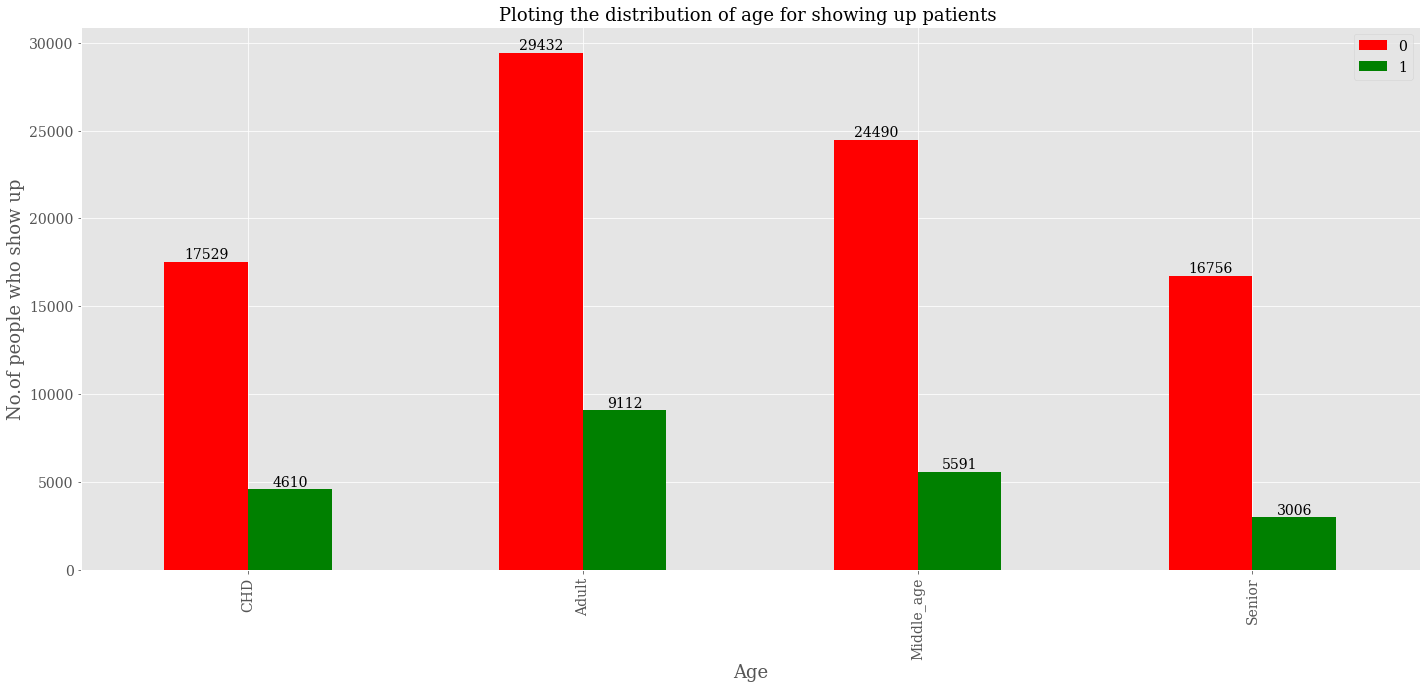

In [43]:
# group data by people who had show up on time and people who had not show up on time and plot the data
fig = (df_copy.groupby("Age_group")['No_show']
.value_counts().unstack()
.plot.bar(figsize=(24,10), color=["red","green"], linewidth=3, fontsize=14));
plt.xlabel('Age', fontsize = 18);
plt.ylabel('No.of people who show up', fontsize = 18);
plt.title('Ploting the distribution of age for showing up patients ',fontsize = 18);
plt.bar_label(fig.containers[0], label_type='edge');
plt.bar_label(fig.containers[1], label_type='edge');
plt.legend(loc = 'upper right');


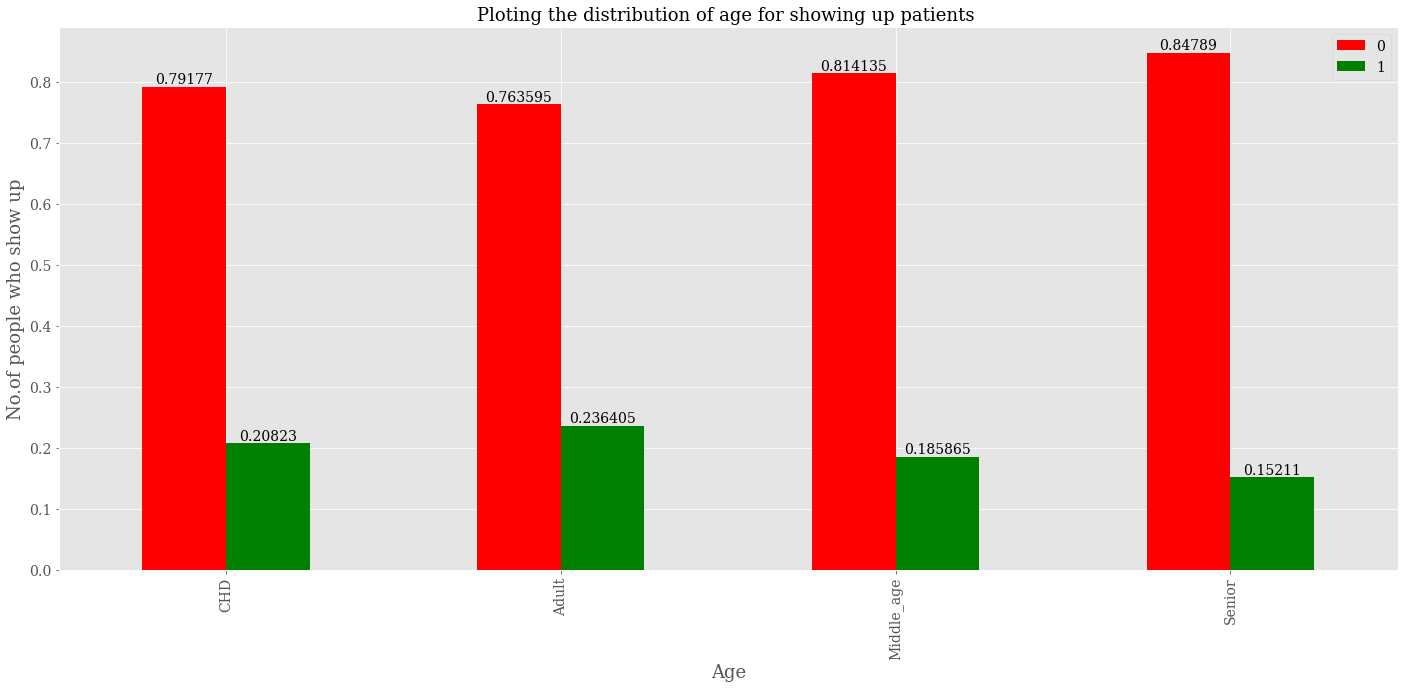

In [44]:
# group data by people who had show up on time and people who had not show up on time and plot the data 
# and standardize data then plot the data
fig = (df_copy.groupby("Age_group")['No_show']
.value_counts(normalize= True).unstack()
.plot.bar(figsize=(24,10), color=["red","green"], linewidth=3, fontsize=14));
plt.xlabel('Age', fontsize = 18);
plt.ylabel('No.of people who show up', fontsize = 18);
plt.title('Ploting the distribution of age for showing up patients ',fontsize = 18);
plt.bar_label(fig.containers[0], label_type='edge');
plt.bar_label(fig.containers[1], label_type='edge');
plt.legend(loc = 'upper right');

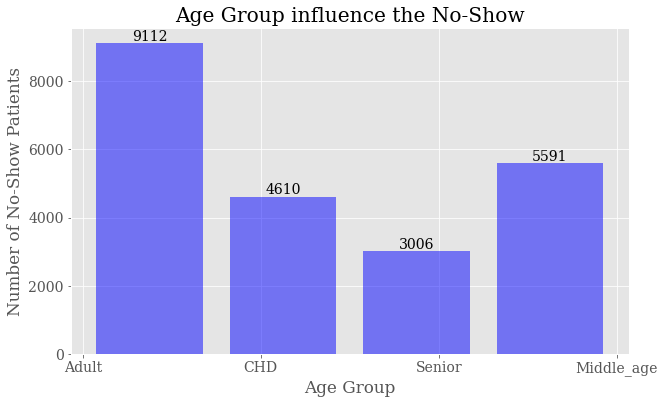

In [30]:
# create mask for no-show dataframe then plot the data
mask = (df_copy["No_show"]== 1)
masked_df = df_copy.loc[mask]
fig = masked_df["Age_group"].hist(figsize=(10,6), color=['blue'], alpha=0.5, bins=4, rwidth=0.8,);
plt.ylabel('Number of No-Show Patients');
plt.xlabel('Age Group');
plt.title("Age Group influence the No-Show");
plt.bar_label(fig.containers[0], label_type='edge');
plt.show();


## Second Conclusion:
#### Does the age affect the patient show-up or no-show ?
* From the data set, we can see that the age affect the patient show-up or no-show.
* The more the age, the less chance the patient to be no-show specially Seniors .

## Does the neighborhood affect the patient show-up or no-show ?

###  Now we will use the data to investigate the relation between the nabehrood and the patient show-up or no-show.

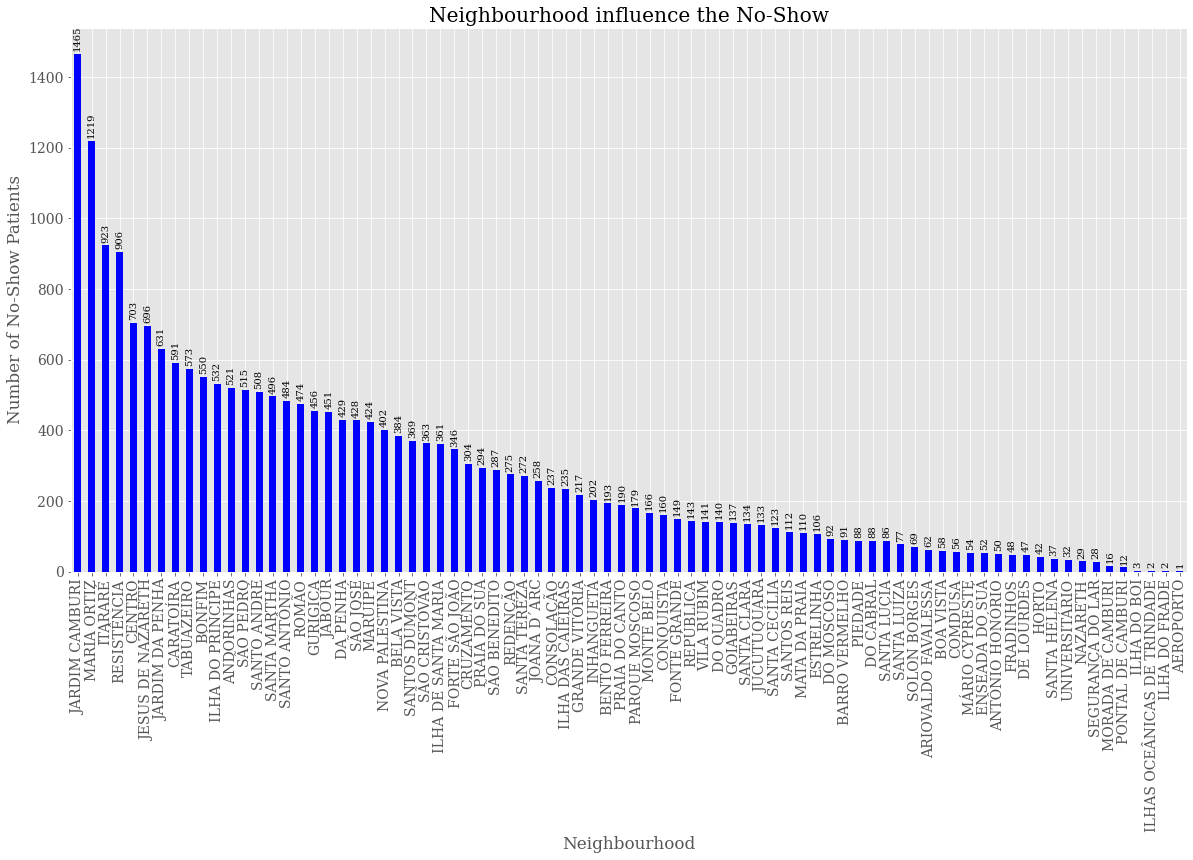

In [31]:
# create mask for no-show dataframe then plot the data
mask = (df_copy["No_show"]== 1)
masked_df = df_copy.loc[mask]
fig = masked_df["Neighbourhood"].value_counts().plot(kind='bar', figsize=(20,10), color=['blue']);
plt.ylabel('Number of No-Show Patients');
plt.xlabel('Neighbourhood');
plt.title("Neighbourhood influence the No-Show");
plt.bar_label(fig.containers[0], label_type='edge', rotation=90, fontsize=10, padding=3);
plt.show();

### Third Conclusion:
#### Does the neighborhood affect the patient show-up or no-show ?
* From the data set, we can see that the neighborhood affect the patient show-up or no-show.
* This chart shows the number of no-show patients in every neighborhood. Jardim Camburi neighborhood has the highest number of no-show, and Aeroport neighborhood has the lowest number of no-show patients.

## limitations:
* The data set is not clean, there are some wrong data in the dataset as the following.
  * patient id is float type
  * appointment id is int type
  * the column ScheduledDay is not a date, it is a string.
  * the column AppointmentDay is not a date, it is a string. 
  * few column names misspelled, like  No-show, Hypertension, Diabetes,Handicap. 
  * the age column have negative values.
  * Also the dataset contains only 3 month information from 2016, so the data is not enough to be used for analysis.
## Conclusion:
we can conclude that cleaning process have been done, so the data is ready to be used for analysis.
to get rid of the wrong data, we can use the following methods:
change the data type of the columns patient id & appointment id
change the column names
change the data types of the columns
calculate the number of days between the scheduled day and appointment
From the data set, we can see that the number of days between the scheduled day and appointment is the most important factor in the patient show-up or no-show.
* The more days between the scheduled day and appointment, the less chance the patient to be no-show.
* Patient Age is one of the the most important factor in the patient show-up or no-show the more the age, the less chance the patient to be no-show specially Seniors .
* The neighborhood affect the patient show-up or no-show Jardim Camburi neighborhood has the highest number of no-show, and Aeroport neighborhood has the lowest number of no-show patients